In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Data Cleaning (KaggleMovies.csv)

In [2]:
df = pd.read_csv('Datasets/KaggleMovies.csv')
pd.set_option('float_format', '{:f}'.format)

In [3]:
# Renaming columns
column_mapping = {
    'name' : 'Name',
    'rating' : 'Rating',
    'genre' : 'Genre',
    'year' : 'Year',
    'released' : 'Released',
    'score' : 'Score',
    'votes' : 'Votes',
    'director' : 'Director',
    'writer' : 'Writer',
    'star' : 'Star',
    'country' : 'Country',
    'budget' : 'Budget',
    'gross' : 'Gross Revenue',
    'company' : 'Company',
    'runtime' : 'Runtime'
}

df = df.rename(columns=column_mapping)

In [4]:
# Check for empty spaces
print(f"Shape: {df.shape}\n")
isnas = df.isna().sum(axis=0)
isnas

Shape: (7668, 15)



Name                0
Rating             77
Genre               0
Year                0
Released            2
Score               3
Votes               3
Director            0
Writer              3
Star                1
Country             3
Budget           2171
Gross Revenue     189
Company            17
Runtime             4
dtype: int64

In [5]:
# Remove rows with null values
df = df.dropna()
print(f"Shape: {df.shape}\n")
print(df.isna().sum(axis=0))

Shape: (5421, 15)

Name             0
Rating           0
Genre            0
Year             0
Released         0
Score            0
Votes            0
Director         0
Writer           0
Star             0
Country          0
Budget           0
Gross Revenue    0
Company          0
Runtime          0
dtype: int64


In [6]:
df['Votes'] = df['Votes'].astype('int')
df['Budget'] = df['Budget'].astype('int')
df['Runtime'] = df['Runtime'].astype('int')
df['Gross Revenue'] = df['Gross Revenue'].astype('int')
df['Score'] = df['Score'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
# Note: For some reason the 'Gross Revenue' column is not detected making me unable to remove trailing 0s in the column
#df['Gross Revenue'] = df['Gross Revenue'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
df.head()

<ipython-input-6-7b255921af55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Votes'] = df['Votes'].astype('int')
<ipython-input-6-7b255921af55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Budget'] = df['Budget'].astype('int')
<ipython-input-6-7b255921af55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross Revenue,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [7]:
# Check number of unique movie names
len(df['Name'].unique())

5336

In [8]:
#Drop duplicate movie names
df = df.drop_duplicates(subset=['Name'], keep='first')
print(f"Shape: {df.shape}\n")
df.head()

Shape: (5336, 15)



,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross Revenue,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [9]:
print(len(df['Rating'].unique()))
print(len(df['Genre'].unique()))
print(len(df['Director'].unique()))
print(len(df['Writer'].unique()))
print(len(df['Star'].unique()))
print(len(df['Country'].unique()))
print(len(df['Company'].unique()))

10
15
2045
3178
1830
50
1464


In [10]:
df.describe()

,Year,Votes,Budget,Gross Revenue,Runtime
count,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000
mean,2001.507309,114229.701274,35649050.434595,101592426.155922,108.087706
std,10.521542,183538.251077,41241714.683371,184167193.593346,18.110382
min,1980.000000,195.000000,6000.000000,309.000000,63.000000
25%,1993.000000,19000.000000,10000000.000000,10622833.750000,95.000000
50%,2002.000000,52000.000000,21000000.000000,35927567.000000,105.000000
75%,2010.000000,128000.000000,45000000.000000,110353970.000000,118.000000
max,2020.000000,2400000.000000,356000000.000000,2847246203.000000,271.000000


<Axes: xlabel='Votes', ylabel='Count'>

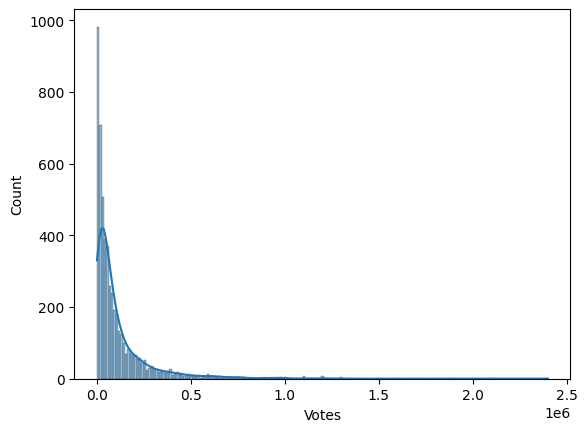

In [11]:
sns.histplot(df['Votes'], kde=True)

In [12]:
df['Votes'] = df['Votes'].apply(lambda x: 500000 if x > 500000 else x)

<Axes: xlabel='Votes', ylabel='Count'>

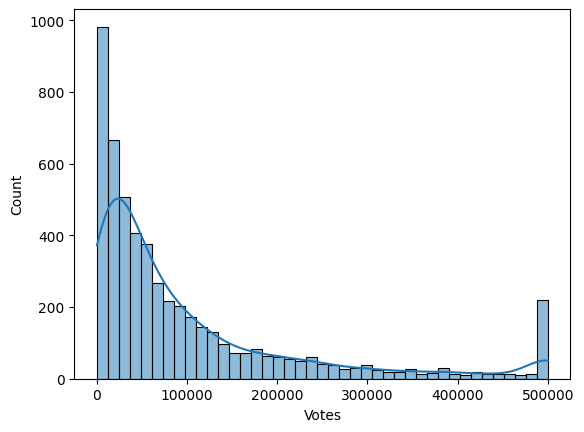

In [13]:
sns.histplot(df['Votes'], kde=True)

<Axes: xlabel='Gross Revenue', ylabel='Count'>

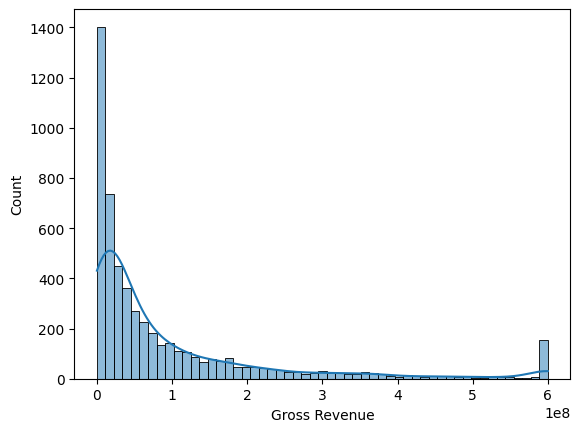

In [14]:
df['Gross Revenue'] = df['Gross Revenue'].apply(lambda x: 600000000 if x > 600000000 else x)
sns.histplot(df['Gross Revenue'], kde=True)

<Axes: xlabel='Budget', ylabel='Count'>

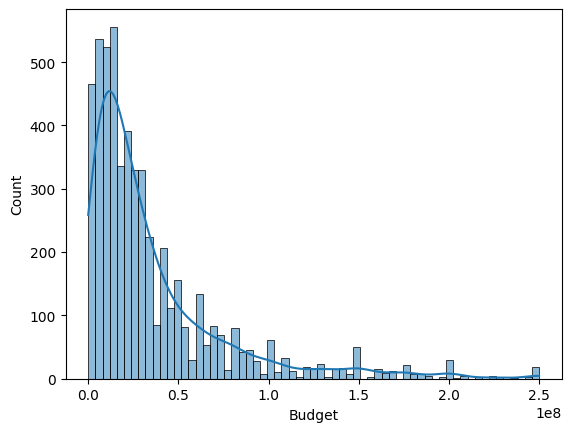

In [15]:
df['Budget'] = df['Budget'].apply(lambda x: 250000000 if x > 250000000 else x)
sns.histplot(df['Budget'], kde=True)

<Axes: xlabel='Year', ylabel='Count'>

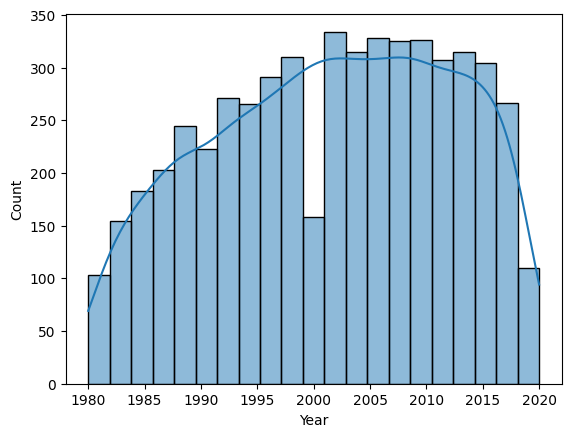

In [16]:
sns.histplot(df['Year'], kde=True)

In [17]:
excluded_columns = ['Rating', 'Year']


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(excluded_columns)

df_new = df.copy()
df_new[numerical_cols] = df[numerical_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_new.head()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross Revenue,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,1.000000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,0.075978,0.078331,Warner Bros.,0.399038
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,0.129661,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,0.017976,0.098088,Columbia Pictures,0.197115
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1.000000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,0.071978,0.897292,Lucasfilm,0.293269
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,0.441782,Jim Abrahams,Jim Abrahams,Robert Hays,United States,0.013976,0.139089,Paramount Pictures,0.120192
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,0.215694,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,0.023977,0.066410,Orion Pictures,0.168269


In [18]:
df_new = df_new.drop(['Director', 'Company', 'Writer', 'Star', 'Released'], axis=1)
df_new['Score'] = df_new['Score'].astype(float)
df_new.head()

,Name,Rating,Genre,Year,Score,Votes,Country,Budget,Gross Revenue,Runtime
0,The Shining,R,Drama,1980,8.400000,1.000000,United Kingdom,0.075978,0.078331,0.399038
1,The Blue Lagoon,R,Adventure,1980,5.800000,0.129661,United States,0.017976,0.098088,0.197115
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.700000,1.000000,United States,0.071978,0.897292,0.293269
3,Airplane!,PG,Comedy,1980,7.700000,0.441782,United States,0.013976,0.139089,0.120192
4,Caddyshack,R,Comedy,1980,7.300000,0.215694,United States,0.023977,0.066410,0.168269


In [19]:
correlation_matrix = df_new.corr()
correlation_matrix

<ipython-input-19-1d0e9eeeb5d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_new.corr()


,Year,Score,Votes,Budget,Gross Revenue,Runtime
Year,1.000000,0.061236,0.286490,0.327309,0.301862,0.075414
Score,0.061236,1.000000,0.501104,0.070100,0.231637,0.413459
Votes,0.286490,0.501104,1.000000,0.510067,0.715947,0.350702
Budget,0.327309,0.070100,0.510067,1.000000,0.758838,0.316680
Gross Revenue,0.301862,0.231637,0.715947,0.758838,1.000000,0.268553
Runtime,0.075414,0.413459,0.350702,0.316680,0.268553,1.000000


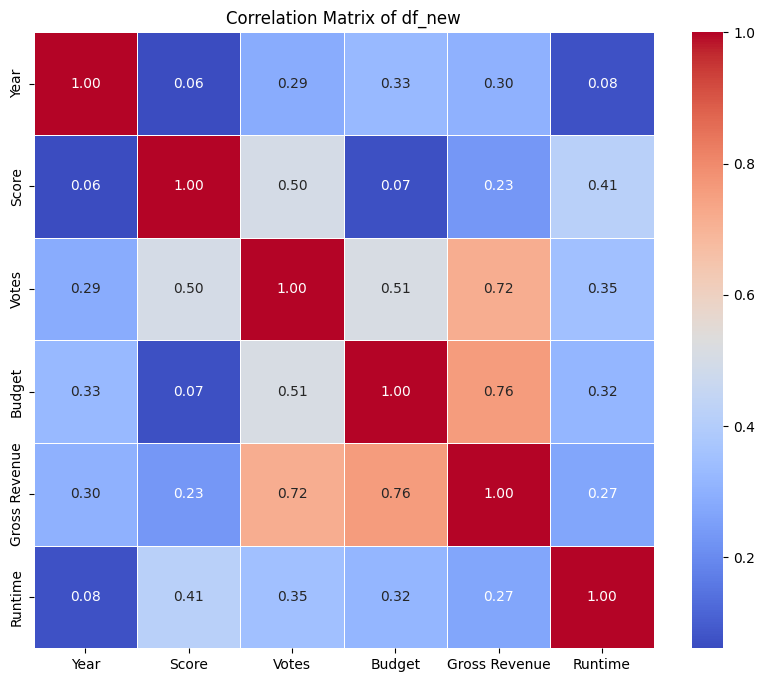

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of df_new')
plt.show()

In [21]:
df_new_encoded = pd.get_dummies(df_new, columns=['Rating', 'Genre'])
df_new_encoded.head()


,Name,Year,Score,Votes,Country,Budget,Gross Revenue,Runtime,Rating_Approved,Rating_G,...,Genre_Crime,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_Western
0,The Shining,1980,8.400000,1.000000,United Kingdom,0.075978,0.078331,0.399038,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Blue Lagoon,1980,5.800000,0.129661,United States,0.017976,0.098088,0.197115,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Star Wars: Episode V - The Empire Strikes Back,1980,8.700000,1.000000,United States,0.071978,0.897292,0.293269,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airplane!,1980,7.700000,0.441782,United States,0.013976,0.139089,0.120192,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Caddyshack,1980,7.300000,0.215694,United States,0.023977,0.066410,0.168269,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning (UCI Dataset)

In [22]:
# NOTE: UCI dataset not complete. The html file is formatted in way that makes creating a dataframe from it
# difficult to accomplish.

# url = 'Datasets/main.html'

# MAIN_df = pd.read_html(url)

# total_dataframe = []

# # Remove any NaNs
# for i in range(len(MAIN_df)):
#     MAIN_df[i].dropna(inplace=True)
# #    print(pd.isna(MAIN_df[i]))

# # Create a list of dataframes created from read_html(url)
# for j, df in enumerate(MAIN_df):
#     total_dataframe.append(MAIN_df[j])

# combined = pd.concat(total_dataframe, ignore_index=True)

# combined


In [23]:
# Function to pop indices that don't have exactly 12 columns
def pop_multiple_indices(dataframes, indices):
    # Sort the indices in descending order so that popping does not affect the subsequent indices
    indices.sort(reverse=True)

    # Pop DataFrames from the list at the specified indices
    popped_dfs = [dataframes.pop(index) for index in indices]

    return popped_dfs

In [24]:
url = 'Datasets/main.html'

MAIN_df = pd.read_html(url)

total_dataframe = []


# Renaming columns
column_mapping3 = {
    'title' : 'Title',
    'prds' : 'Producer',
    'prc.1' : 'Genre',
    'cat' : 'Awards',
    'ct' : "Genre",
    'aw' : "Awards",
    'st' : 'Studio',
    'st.' : 'Studio',
    'producers' : 'Producer',
    'prodrs' : 'Producer',
    'prods' : 'Producer',
    'prds' : 'Producer'
}
for i in range(len(MAIN_df)):
    MAIN_df[i] = MAIN_df[i].rename(columns=column_mapping3)

In [25]:
# Check number of columns in each dataframe
counter = 0
indices = []
for i in range(len(MAIN_df)):
    num_columns = MAIN_df[i].shape[1]
    #print("Number of columns at index " + str(i) + ":", num_columns)
    if ((num_columns < 12) or (num_columns == 13)):
        #print("Pop at index " + str(i))
        counter = counter + 1
        indices.append(i)

# Check how many dataframes do not have 12 columns
# print(counter)
# print(indices)


In [26]:
# Assuming dfs is your list of dataframes and indices is a list of indices you want to pop
popped_dfs = pop_multiple_indices(MAIN_df, indices)

counter2 = 0
indices2 = []
for i in range(len(MAIN_df)):
    num_columns = MAIN_df[i].shape[1]
    #print("Number of columns at index " + str(i) + ":", num_columns)
    if ((num_columns < 12) or (num_columns == 13)):
        #print("Pop at index " + str(i))
        counter2 = counter2 + 1
        indices2.append(i)

# Check that all dataframes have 12 columns
print("Number of dataframes that don't have 12 columns: " + str(counter2))
print("Indices where dataframe does not have 12 columns:", indices2)

Number of dataframes that don't have 12 columns: 0
Indices where dataframe does not have 12 columns: []


In [27]:
# Drop useless columns
for i in range(len(MAIN_df)):
    # Drop unneeded columns
    MAIN_df[i] = MAIN_df[i].drop(MAIN_df[i].columns[[0, 6, 9, 10, 11]], axis=1)
    #print('Dataframe ' + str(i) + ' is good')

# print(MAIN_df[0].columns)
# print(MAIN_df[567].columns)


In [28]:
# Remove NaNs
clean_dfs = []
for i in range(len(MAIN_df)):
    clean_df = MAIN_df[i].dropna()  # Drop rows containing NaN values
    clean_dfs.append(clean_df)

MAIN_df = clean_dfs

In [29]:
# Checking for out of place column names
counter3 = 0
indices3 = []
for i in range(len(MAIN_df)):
    if ((MAIN_df[i].columns[0] == 1) or (MAIN_df[i].columns[0] == 'Unnamed: 1')):
        counter3 = counter3 + 1
        indices3.append(i)

print(counter3)
print(indices3)

# Removing out of place column names
popped_dfs2 = pop_multiple_indices(MAIN_df, indices3)


43
[506, 651, 773, 953, 1007, 1219, 1790, 1791, 1876, 1909, 1997, 2022, 2111, 2538, 2588, 2608, 2611, 2623, 2632, 2675, 2687, 2754, 2757, 2766, 2776, 2818, 2819, 2822, 2823, 2826, 2827, 2828, 2830, 2831, 2836, 2837, 2838, 2840, 2841, 2845, 2847, 2849, 2850]


In [30]:
print(MAIN_df)

[                          Title  @1940  D:Hitchcock  \
0                     T:Rebecca   1940  D:Hitchcock   
1       T:Foreign Correspondent   1940  D:Hitchcock   
4                    T:Saboteur   1942  D:Hitchcock   
6                    T:Lifeboat   1943  D:Hitchcock   
7                  T:Spellbound   1945  D:Hitchcock   
8                   T:Notorious   1946  D:Hitchcock   
9           T:The Paradine Case   1947  D:Hitchcock   
10                       T:Rope   1948  D:Hitchcock   
13       T:Strangers on a Train   1951  D:Hitchcock   
15          T:Dial M for Murder   1954  D:Hitchcock   
16                T:Rear Window   1954  D:Hitchcock   
17           T:To Catch a Thief   1955  D:Hitchcock   
19  T:The Man Who Knew Too Much   1956  D:Hitchcock   
21                    T:Vertigo   1958  D:Hitchcock   
22         T:North by Northwest   1959  D:Hitchcock   
23                     T:Psycho   1960  D:Hitchcock   
24                  T:The Birds   1963  D:Hitchcock   
26       

In [31]:
# Eliminate unneccessary characters from 'Producer' (WIP)
# Current problem: "AttributeError: Can only use .str accessor with string values!"
# for i in range(len(MAIN_df)):
# # for i in range(1000):
#     contains_character1 = MAIN_df[i]['Producer'].str.contains('P:')
#     contains_character2 = MAIN_df[i]['Producer'].str.contains('PN:')
#     check1 = contains_character1.any()
#     check2 = contains_character2.any()
#     if (check1 == True):
#         MAIN_df[i]['Producer'] = MAIN_df[i]['Producer'].str.replace('P:', '', regex=True)
#     elif (check2 == True):
#         MAIN_df[i]['Producer'] = MAIN_df[i]['Producer'].str.replace('PN:', '', regex=True)
#     print("index " + str(i) + " is good")

In [32]:
MAIN_df[1000]

,Title,@1963,D:Previn,Producer,Studio,Genre,Awards
0,T:The Waltz King,1963,D:Previn,PN:Peter V. Herald,St:Disney,Musc,H


# Data Cleaning (BoxOfficeCollections.csv)

In [33]:
BoxOff_df = pd.read_csv('Datasets/BoxOfficeCollections.csv')

In [34]:
print(list(BoxOff_df.columns.values))

# Renaming columns
column_mapping2 = {
    'Imdb_genre' : 'IMDB Genre',
    'metascore' : 'Metascore',
    'time_minute' : 'Time(Min)',
    'Movie' : 'Name',

}

BoxOff_df = BoxOff_df.rename(columns=column_mapping2)
BoxOff_df.head()
BoxOff_df.shape

['Movie', 'Year', 'Score', 'Adjusted Score', 'Director', 'Cast', 'Consensus', 'Box Office Collection', 'Imdb_genre', 'IMDB Rating', 'metascore', 'time_minute', 'Votes']


(1378, 13)

In [35]:

# Remove trailing zeros from the 'GrossRevenue' column
BoxOff_df['Adjusted Score'] = BoxOff_df['Adjusted Score'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
BoxOff_df['Box Office Collection'] = BoxOff_df['Box Office Collection'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
BoxOff_df['IMDB Rating'] = BoxOff_df['IMDB Rating'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
BoxOff_df['Metascore'] = BoxOff_df['Metascore'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
BoxOff_df['Time(Min)'] = BoxOff_df['Time(Min)'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
BoxOff_df['Votes'] = BoxOff_df['Votes'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)

In [36]:
# Remove rows with null values
BoxOff_df = BoxOff_df.dropna()
isnas3 = BoxOff_df.isna()
#print(isnas3)

BoxOff_df

,Name,Year,Score,Adjusted Score,Director,Cast,Consensus,Box Office Collection,IMDB Genre,IMDB Rating,Metascore,Time(Min),Votes
0,Hot Rod,2007,39,42.918,Akiva Schaffer,"Andy Samberg, Jorma Taccone, Bill Hader, Danny...","For Rod Kimball (Andy Samberg), performing stu...",14371564,Comedy,6.7,43,88,84956
1,Game Night,2018,85,99.838,John Francis Daley,"Jason Bateman, Rachel McAdams, Kyle Chandler, ...",Max and Annie's weekly game night gets kicked ...,117378084,Comedy,6.9,66,100,229292
2,The First Wives Club,1996,49,53.174,Hugh Wilson,"Goldie Hawn, Bette Midler, Diane Keaton, Maggi...",Despondent over the marriage of her ex-husband...,181489203,Comedy,6.4,58,103,48413
3,Scary Movie,2000,52,54.973,Keenen Ivory Wayans,"Shawn Wayans, Marlon Wayans, Cheri Oteri, Shan...","Defying the very notion of good taste, Scary M...",277200000,Comedy,6.2,48,88,254927
4,Blockers,2018,84,96.883,Kay Cannon,"Leslie Mann, Ike Barinholtz, John Cena, Kathry...","Julie, Kayla and Sam are three high school sen...",94523781,Comedy,6.2,69,102,78498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,Stalker,1979,100,103.012,Andrei Tarkovsky,"Aleksandr Kajdanovsky, Nikolay Grinko, Anatoli...","In an unnamed country at an unspecified time, ...",296334,Drama,8.1,nan,162,131448
1363,Tampopo,1985,100,105.082,Juzo Itami,"Tsutomu Yamazaki, Nobuko Miyamoto, Ken Watanab...",Two Japanese milk-truck drivers (Tsutomu Yamaz...,nan,Comedy,7.9,87,114,18557
1367,Three Colors: Red,1994,100,101.27,Krzysztof Kieslowski,"Irène Jacob, Jean-Louis Trintignant, Frédériqu...",Part-time model Valentine (Irène Jacob) meets ...,nan,Drama,8.1,100,99,101519
1369,Top Hat,1935,100,107.903,Mark Sandrich,"Fred Astaire, Ginger Rogers, Edward Everett Ho...",The story centers on wealthy Dale Tremont (Gin...,3202000,Comedy,7.7,92,101,19036


In [37]:
merged = pd.concat([df, BoxOff_df], axis=0).reset_index(drop=True)
merged

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,...,Company,Runtime,Adjusted Score,Cast,Consensus,Box Office Collection,IMDB Genre,IMDB Rating,Metascore,Time(Min)
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,500000,Stanley Kubrick,Stephen King,Jack Nicholson,...,Warner Bros.,146.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,Columbia Pictures,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,500000,Irvin Kershner,Leigh Brackett,Mark Hamill,...,Lucasfilm,124.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,...,Paramount Pictures,88.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,...,Orion Pictures,98.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,Stalker,NaN,NaN,1979,NaN,100,131448,Andrei Tarkovsky,NaN,NaN,...,NaN,NaN,103.012,"Aleksandr Kajdanovsky, Nikolay Grinko, Anatoli...","In an unnamed country at an unspecified time, ...",296334,Drama,8.1,nan,162
6355,Tampopo,NaN,NaN,1985,NaN,100,18557,Juzo Itami,NaN,NaN,...,NaN,NaN,105.082,"Tsutomu Yamazaki, Nobuko Miyamoto, Ken Watanab...",Two Japanese milk-truck drivers (Tsutomu Yamaz...,nan,Comedy,7.9,87,114
6356,Three Colors: Red,NaN,NaN,1994,NaN,100,101519,Krzysztof Kieslowski,NaN,NaN,...,NaN,NaN,101.27,"Irène Jacob, Jean-Louis Trintignant, Frédériqu...",Part-time model Valentine (Irène Jacob) meets ...,nan,Drama,8.1,100,99
6357,Top Hat,NaN,NaN,1935,NaN,100,19036,Mark Sandrich,NaN,NaN,...,NaN,NaN,107.903,"Fred Astaire, Ginger Rogers, Edward Everett Ho...",The story centers on wealthy Dale Tremont (Gin...,3202000,Comedy,7.7,92,101
